# Step 1

In [281]:
from sklearn.base import BaseEstimator
from sklearn.linear_model import LinearRegression
class PolyRegress(BaseEstimator):
    def __init__(self, deg=None):
        self.deg=deg
    def fit(self,X,y,deg=None):
        self.model=LinearRegression(fit_intercept=False)
        self.model.fit(np.vander(X,N=self.deg+1,increasing=True),y)
    def predict(self,x):
        return self.model.predict(np.vander(x,N=self.deg+1, increasing=True))
    @property #treat method as property
    def coaf_(self):
        return self.model.coef_

# Required answer 1

In [282]:
import numpy as np
coef = np.poly([1,2,3,4,5])
p_obj = np.poly1d(coef)

# Required answer 2

In [283]:
p_obj


poly1d([   1.,  -15.,   85., -225.,  274., -120.])

In [284]:
def fc(x):
    ans=0
    for i in range(6):
        ans=ans+p_obj[i]*x**i 
    return ans
    

# Required answer 3

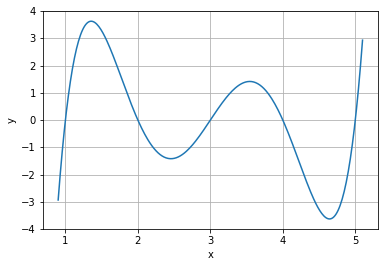

In [285]:
import matplotlib.pyplot as plt
import matplotlib as mpl
x=np.linspace(0.9,5.1,300)
y=fc(x)
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(linestyle='-')
plt.show()

In [286]:
np.random.seed(20)
yn = y + np.random.normal(scale = 0.2, size = x.shape)

# Required answer 4

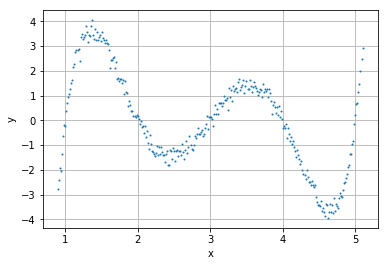

In [287]:
y=fc(x)
plt.plot(x, yn, 'o',markersize = 1)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(linestyle='-')
plt.show()

# Required answer 5

In [288]:
model = PolyRegress(deg=5)
model.fit(x,yn)
ynP=model.predict(x)
model.coaf_

array([-120.50523928,  275.14704606, -225.98809431,   85.39865118,
        -15.07495529,    1.00527647])

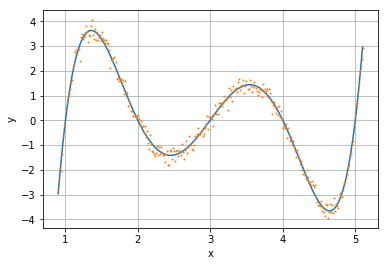

In [289]:
plt.plot(x, ynP)
plt.plot(x, yn, 'o',markersize = 1)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(linestyle='-')
plt.show()

# Required answer 6

In [290]:
np.vander(np.linspace(1,10,10, dtype = int),N=5, increasing = True)

array([[    1,     1,     1,     1,     1],
       [    1,     2,     4,     8,    16],
       [    1,     3,     9,    27,    81],
       [    1,     4,    16,    64,   256],
       [    1,     5,    25,   125,   625],
       [    1,     6,    36,   216,  1296],
       [    1,     7,    49,   343,  2401],
       [    1,     8,    64,   512,  4096],
       [    1,     9,    81,   729,  6561],
       [    1,    10,   100,  1000, 10000]])

In [291]:
np.vander(np.linspace(1,10,10, dtype = int),N=5, increasing = False)

array([[    1,     1,     1,     1,     1],
       [   16,     8,     4,     2,     1],
       [   81,    27,     9,     3,     1],
       [  256,    64,    16,     4,     1],
       [  625,   125,    25,     5,     1],
       [ 1296,   216,    36,     6,     1],
       [ 2401,   343,    49,     7,     1],
       [ 4096,   512,    64,     8,     1],
       [ 6561,   729,    81,     9,     1],
       [10000,  1000,   100,    10,     1]])

In [292]:
model = PolyRegress(deg=5)
model.fit(x,y)
ynP=model.predict(x)
model.coaf_

array([-120.,  274., -225.,   85.,  -15.,    1.])

# Required asnwer 7

In [293]:
from sklearn.base import BaseEstimator
from sklearn.linear_model import LinearRegression
class PolyRegress2(BaseEstimator):
    def __init__(self, deg=None):
        self.deg=deg
    def fit(self,X,y,deg=None):
        self.model=LinearRegression(fit_intercept=False)
        self.model.fit(np.vander(X,N=self.deg+1,increasing=False),y)
    def predict(self,x):
        return self.model.predict(np.vander(x,N=self.deg+1, increasing=False))
    @property #treat method as property
    def coaf_(self):
        return self.model.coef_

In [294]:
model = PolyRegress2(deg=5)
model.fit(x,yn)
ynP=model.predict(x)
model.coaf_

array([   1.00527647,  -15.07495529,   85.39865118, -225.98809431,
        275.14704606, -120.50523928])

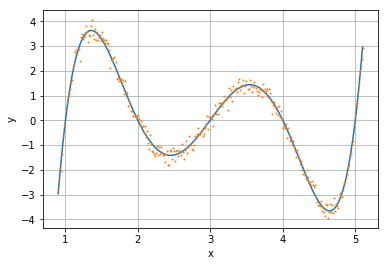

In [295]:
plt.plot(x, ynP)
plt.plot(x, yn, 'o',markersize = 1)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(linestyle='-')
plt.show()

In [296]:
from sklearn.preprocessing import PolynomialFeatures 
class OtherRegress(BaseEstimator):
    def __init__(self,deg=None, option='other'):
        """option can be either 'other or 'polynomial'"""
        self.deg=deg
        self.option=option
    def fit(self, X, y, deg=None):
        self.model = LinearRegression(fit_intercept=False)
        if self.option=='other':
            mod_poly=PolynomialFeatures(degree=self.deg)
            XX=mod_poly.fit_transform(np.c_[np.sin(X),np.cos(X),X])
            self.model.fit(XX,y)
            self.XX=XX
        else:
            self.model.fit(np.vander(X, N=self.deg+1, increasing=True),y)
    def predict(self, x):
        if self.option=='other':
            mod_poly=PolynomialFeatures(degree=self.deg)
            XX=mod_poly.fit_transform(np.c_[np.sin(x),np.cos(x),x])
            return self.model.predict (XX)
        else:
            return self.model.predict(np.vander(x, N=self.deg+1, increasing=True))
    @property #treat method as property
    def coef_(self):
        return self.model.coef_

# Required answer 8

In [297]:
model_other = OtherRegress(deg=2)
model_other.fit(x,yn)
ynP=model_other.predict(x)
coef_mat=model_other.coef_

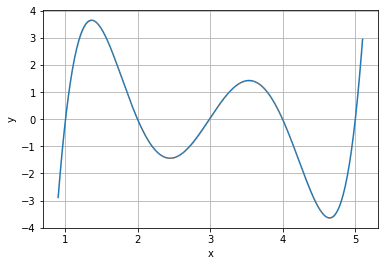

In [298]:
plt.plot(x, ynP)
plt.plot(x, ynP, 'o',markersize = 0.1)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(linestyle='-')
plt.show()

In [299]:
from sklearn.model_selection import GridSearchCV
cv_model = GridSearchCV(OtherRegress(), cv=5, param_grid={'deg' : range(1,7),'option':['other','polynomial']}, scoring='r2')
cv_model.fit(x,yn)
cv_model.best_estimator_

OtherRegress(deg=5, option='polynomial')

# Required answer 9

In [300]:
cv_model = GridSearchCV(OtherRegress(), cv=5, param_grid={'deg' : range(1,5),'option':['other','polynomial']}, scoring='r2')
cv_model.fit(x,yn)
cv_model.best_estimator_

OtherRegress(deg=2, option='other')

# Required answer 10

In [301]:
import pandas as pd
df = pd.DataFrame(cv_model.cv_results_)
df

C:\Users\aryas\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\aryas\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\aryas\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\aryas\Anaconda3\lib\site-packages\sklearn\util

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_deg,param_option,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000724,0.000634,0.000799,0.000399,1,other,"{'deg': 1, 'option': 'other'}",-2.527148e+00,-5.083775,-0.427777,...,-3.042558e+00,1.732513e+00,4,0.207694,0.439688,0.341744,0.427114,0.198113,0.322871,0.103633
1,0.000442,0.000452,0.000151,0.000303,1,polynomial,"{'deg': 1, 'option': 'polynomial'}",-1.020642e+00,-2.162330,-0.545918,...,-1.385141e+00,6.482662e-01,2,0.115764,0.402195,0.339478,0.396255,0.112973,0.273333,0.131631
2,0.000353,0.000433,0.000200,0.000399,2,other,"{'deg': 2, 'option': 'other'}",-2.350536e+00,0.964262,0.946701,...,-2.588264e-02,1.320011e+00,1,0.985541,0.991072,0.991565,0.990765,0.983283,0.988445,0.003379
3,0.000200,0.000399,0.000200,0.000399,2,polynomial,"{'deg': 2, 'option': 'polynomial'}",-3.448849e+00,-2.908219,-0.546513,...,-2.619499e+00,1.066575e+00,3,0.176427,0.419802,0.339480,0.410239,0.167504,0.302690,0.110320
4,0.000945,0.000161,0.000523,0.000448,3,other,"{'deg': 3, 'option': 'other'}",-1.029305e+07,0.890463,0.927660,...,-3.603761e+06,4.487733e+06,7,0.985694,0.991203,0.991682,0.990863,0.983542,0.988597,0.003329
5,0.000200,0.000399,0.000196,0.000391,3,polynomial,"{'deg': 3, 'option': 'polynomial'}",-2.765161e+00,-5.931530,-0.547218,...,-3.492673e+00,2.051177e+00,5,0.177214,0.457900,0.339480,0.444408,0.168898,0.317580,0.124951
6,0.001001,0.000553,0.000814,0.000498,4,other,"{'deg': 4, 'option': 'other'}",-1.574585e+09,-0.491432,0.151611,...,-1.792404e+09,2.863213e+09,8,0.986048,0.991297,0.991809,0.991027,0.983609,0.988758,0.003309
7,0.000395,0.000487,0.000616,0.000504,4,polynomial,"{'deg': 4, 'option': 'polynomial'}",-2.415351e+02,-6.166197,-0.549474,...,-9.964488e+01,1.168799e+02,6,0.882056,0.459536,0.339491,0.446409,0.864019,0.598302,0.228224


In [304]:
df[['mean_test_score','params']].iloc[2]

mean_test_score                       -0.0258826
params             {'deg': 2, 'option': 'other'}
Name: 2, dtype: object

In [308]:
df.to_csv('cv_detailes.csv')

# Required answer 11

In [309]:
from sklearn.model_selection import GridSearchCV
cv_model = GridSearchCV(OtherRegress(), cv=5, param_grid={'deg' : range(1,7),'option':['other','polynomial']}, scoring='r2')
cv_model.fit(x,yn)
ynp=cv_model.predict(x)

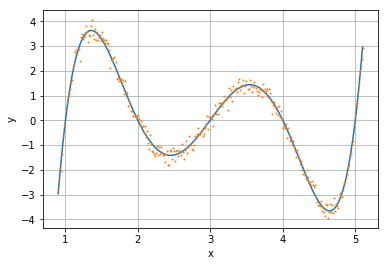

In [310]:
plt.plot(x, ynp)
plt.plot(x, yn, 'o',markersize = 1)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(linestyle='-')
plt.show()

# Required answer 12

In [488]:
import numpy as np
coef = np.poly([-2,-1,0,1,2])
p_obj = np.poly1d(coef)

In [489]:
def fc2(x):
    ans=0
    for i in range(6):
        ans=ans+p_obj[i]*x**i 
    return ans

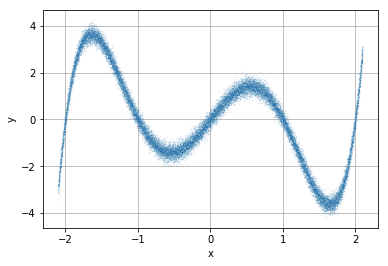

In [490]:
import matplotlib.pyplot as plt
import matplotlib as mpl
x=np.linspace(-2.1,2.1,30000)
y=fc2(x)
np.random.seed(20)
yn = y + np.random.normal(scale = 0.2, size = x.shape)
plt.plot(x, yn,'o', markersize=0.1,alpha=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(linestyle='-')
plt.show()

# Required asnwer 13

In [491]:
model_other = OtherRegress(deg=2)
model_other.fit(x,yn)
ynP=model_other.predict(x)
coef_mat=model_other.coef_
coef_mat

array([  -2.21638295, -235.69885391,    3.26660342,  147.79586029,
         -1.16267768,  -10.59722252,    1.04715888,   -1.05370527,
        102.46108913,    0.70328027])

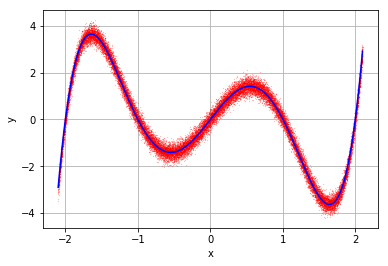

In [492]:
plt.plot(x, yn, 'ro',markersize = 0.1)
plt.plot(x, ynP,'blue')
plt.xlabel("x")
plt.ylabel("y")
plt.grid(linestyle='-')
plt.show()

# Required asnwer 14

In [493]:
from sklearn.metrics import r2_score
r2_score(yn,ynP)

0.9889903999131731

In [494]:
class scx_bases(BaseEstimator):
    '''sine/cosine/x bases'''
    def __int__(self):
        pass
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None): #add sin / cos column to x
        return np.c_[np.sin(X), np.cos(X), X]
    def fit_transform(self,X,y=None):
        #x need to be a column vector
        self.fit(X)
        self.ans=self.transform(X,y=None)
        return self.ans
        

In [495]:
from sklearn.preprocessing import StandardScaler
scx=scx_bases()
poly=PolynomialFeatures(degree=2)
std_scale=StandardScaler()

In [496]:
from sklearn.pipeline import Pipeline
preprocess_pipe = Pipeline([('scx',scx),('poly',poly),('std_scl',std_scale)])

In [497]:
x_scl=preprocess_pipe.fit_transform(x.reshape(-1,1))
x_scl

array([[ 0.        , -1.11091961, -1.92103527, ..., -0.3967661 ,
         2.33150879,  2.23584438],
       [ 0.        , -1.11101056, -1.92078177, ..., -0.39710855,
         2.33079524,  2.2353972 ],
       [ 0.        , -1.11110149, -1.92052825, ..., -0.39745095,
         2.33008171,  2.23495004],
       ...,
       [ 0.        ,  1.11110149, -1.92052825, ..., -0.39745095,
        -2.33008171,  2.23495004],
       [ 0.        ,  1.11101056, -1.92078177, ..., -0.39710855,
        -2.33079524,  2.2353972 ],
       [ 0.        ,  1.11091961, -1.92103527, ..., -0.3967661 ,
        -2.33150879,  2.23584438]])

# Required answer 15

In [498]:
pd.DataFrame(x_scl).head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,-1.110920,-1.921035,-1.731993,0.396766,1.300510,1.376608,-0.396766,2.331509,2.235844
1,0.0,-1.111011,-1.920782,-1.731878,0.397109,1.300305,1.376651,-0.397109,2.330795,2.235397
2,0.0,-1.111101,-1.920528,-1.731762,0.397451,1.300100,1.376693,-0.397451,2.330082,2.234950
3,0.0,-1.111192,-1.920275,-1.731647,0.397793,1.299895,1.376735,-0.397793,2.329368,2.234503
4,0.0,-1.111283,-1.920021,-1.731531,0.398136,1.299690,1.376777,-0.398136,2.328655,2.234056


In [499]:
df = pd.DataFrame(x_scl).head()
df.to_csv('ans_16.csv')

# Required abswer 16

In [500]:
from sklearn.linear_model import SGDRegressor
reg=SGDRegressor(warm_start=True)
para_eta0=[10**(-i) for i in range(1,10)]
para_max_iter=[3,5,7,9,11]
para_learning_rate=['constant','optimal','invscaling']
param_grid={'eta0':para_eta0, 'learning_rate':para_learning_rate,'max_iter':para_max_iter}
sgd_model=GridSearchCV(reg, param_grid=param_grid, scoring='r2',cv=5)
sgd_model.fit(x_scl,yn)


GridSearchCV(cv=5, error_score='raise',
       estimator=SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=True),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'eta0': [0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09], 'learning_rate': ['constant', 'optimal', 'invscaling'], 'max_iter': [3, 5, 7, 9, 11]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [501]:
best_mod=sgd_model.best_estimator_
best_mod

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=7, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=True)

# Required answer 17

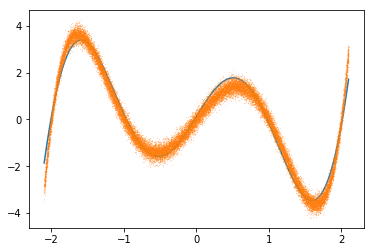

In [502]:
y_sgd_pred=best_mod.predict(x_scl)
plt.plot(x,y_sgd_pred)
plt.plot(x,yn,'o',markersize=0.1)

In [503]:
r2_score(yn,y_sgd_pred)

0.9689492584116491

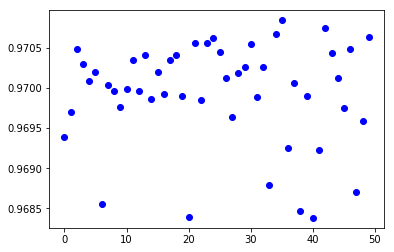

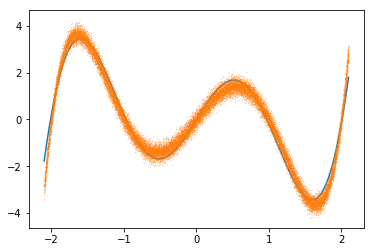

In [504]:
import matplotlib.pyplot as plt
import matplotlib as mpl
sgd=SGDRegressor(warm_start=True,eta0=0.1,learning_rate='invscaling',max_iter=7)
r2=[]
epoch=50
for i in range(epoch):
    sgd.fit(x_scl,yn)
    y_pred=sgd.predict(x_scl)
    r2.append(r2_score(yn,y_pred))
plt.figure()
plt.plot(list(range(epoch)),r2,'bo')
plt.show()

plt.plot(x,sgd.predict(preprocess_pipe.fit_transform(x.reshape(-1,1))))
plt.plot(x,yn,'o',markersize=0.1)
plt.show()

# Required asnwer 18

In [600]:
s_idx=[i*int(30000/4) for i in range(4)]+[30000]
s_idx

[0, 7500, 15000, 22500, 30000]

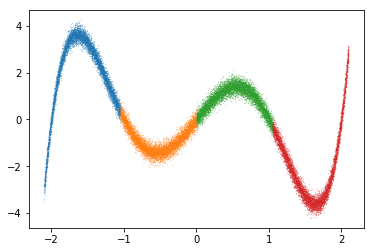

In [609]:
data=np.c_[x,yn]
for i in range(4):
    tem=data[s_idx[i]:s_idx[i+1]]
    plt.plot(tem[:,0],tem[:,1],'o',markersize=0.1)
    np.savetxt('data'+str(i)+'.csv',tem)
plt.show()

# Required answer 19

In [611]:
import csv
import pandas as pd
data=np.c_[x,yn]

for i in range(9):
        with open('data'+str(i)+'.csv','w',newline='') as f:
            thewriter=csv.writer(f) 
            tem=data[s_idx_2[i]:s_idx_2[i+1]]
            for j in range(len(tem)):
                thewriter.writerow([tem[j,0],tem[j,1]])

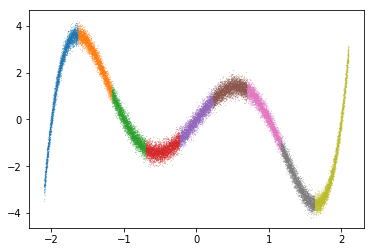

In [612]:
s_idx_2=[i*int(30000/9) for i in range(9)]+[30000]
s_idx_2
for i in range(9):
    tem=data[s_idx_2[i]:s_idx_2[i+1]]
    plt.plot(tem[:,0],tem[:,1],'o',markersize=0.1)
    np.savetxt('data'+str(i)+'.csv',tem)
plt.show()

# Required answer 20

In [613]:
scx=scx_bases()
poly=PolynomialFeatures(degree=3)
std_scale=StandardScaler()

from sklearn.pipeline import Pipeline
preprocess_pipe=Pipeline([('scx',scx),('poly',poly),('std_scl',std_scale)])

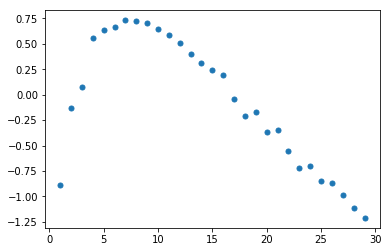

In [621]:
#making the test dataset for r2 calculation
i=0
data=np.loadtxt('data'+str(i)+'.csv')
x_=data[:,0]
x_scl=preprocess_pipe.fit_transform(x_)
#start to open each file and run sgd.partial_fit
def r2_for_train_n_times(n,return_all=False):
    sgd=SGDRegressor(alpha=0.0001,average=False,epsilon=0.1,eta0=0.001,fit_intercept=True,l1_ratio=0.15
                    , learning_rate='invscaling',loss='squared_loss',max_iter=3, 
                    n_iter=None, penalty='l2',power_t=0.25, random_state=None, shuffle=True, 
                    tol=None, verbose=0, warm_start=True)
    i=0
    data=np.loadtxt('data'+str(i)+'.csv')
    x_=data[:,0]
    y_=data[:,1]
    x_scl=preprocess_pipe.transform(x_)
    for it_train in range(n):
        sgd.partial_fit(x_scl,y_)
        
    for i in range(1, 9):
        data=np.loadtxt('data'+str(i)+'.csv')
        x_=data[:,0]
        y_=data[:,1]
        x_scl=preprocess_pipe.transform(x_)
        for it_train in range(n):
            sgd.partial_fit(x_scl,y_)
    x2_scl__=preprocess_pipe.transform(x)
    y_pred=sgd.predict(x2_scl__)
    r2=r2_score(yn,y_pred)
    if return_all:
        return r2, sgd
    else:
        return r2
r2_list=[]
n_list=list(range(1,30))
for n in n_list:
    r2_list.append(r2_for_train_n_times(n))
plt.plot(n_list,r2_list,'o',markersize=5)
plt.show()

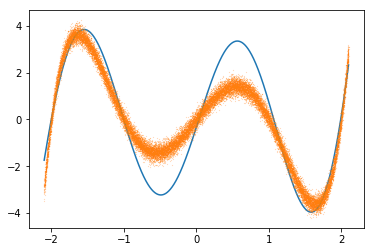

In [623]:
r2,sgd=r2_for_train_n_times(8,return_all=True)

x2_scl__=preprocess_pipe.transform(x)
y_pred=sgd.predict(x2_scl__)

plt.plot(x,y_pred)
plt.plot(x,yn,'o',markersize=0.1)
plt.show()

# Required asnwer 21

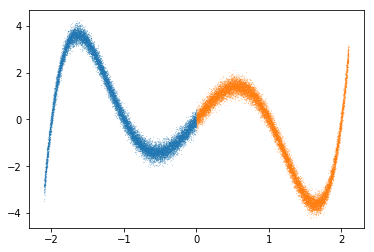

In [646]:
data=np.c_[x,yn]
s_idx_3=[i*int(30000/2) for i in range(2)]+[30000]
s_idx_3
for i in range(2):
    tem=data[s_idx_3[i]:s_idx_3[i+1]]
    plt.plot(tem[:,0],tem[:,1],'o',markersize=0.1)
    np.savetxt('data'+str(i)+'.csv',tem)
plt.show()

In [647]:
scx=scx_bases()
poly=PolynomialFeatures(degree=3)
std_scale=StandardScaler()

from sklearn.pipeline import Pipeline
preprocess_pipe=Pipeline([('scx',scx),('poly',poly),('std_scl',std_scale)])

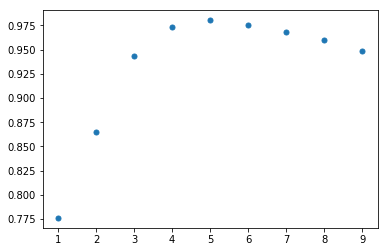

In [649]:
9#making the test dataset for r2 calculation
i=0
data=np.loadtxt('data'+str(i)+'.csv')
x_=data[:,0]
x_scl=preprocess_pipe.fit_transform(x_)
#start to open each file and run sgd.partial_fit
def r2_for_train_n_times(n,return_all=False):
    sgd=SGDRegressor(alpha=0.0001,average=False,epsilon=0.1,eta0=0.1,fit_intercept=True,l1_ratio=0.15
                    , learning_rate='invscaling',loss='squared_loss',max_iter=9, 
                    n_iter=None, penalty='l2',power_t=0.25, random_state=None, shuffle=True, 
                    tol=None, verbose=0, warm_start=True)
    i=0
    data=np.loadtxt('data'+str(i)+'.csv')
    x_=data[:,0]
    y_=data[:,1]
    x_scl=preprocess_pipe.transform(x_)
    for it_train in range(n):
        sgd.partial_fit(x_scl,y_)
        
    for i in range(1, 2):
        data=np.loadtxt('data'+str(i)+'.csv')
        x_=data[:,0]
        y_=data[:,1]
        x_scl=preprocess_pipe.transform(x_)
        for it_train in range(n):
            sgd.partial_fit(x_scl,y_)
    x2_scl__=preprocess_pipe.transform(x)
    y_pred=sgd.predict(x2_scl__)
    r2=r2_score(yn,y_pred)
    if return_all:
        return r2, sgd
    else:
        return r2
r2_list=[]
n_list=list(range(1,10))
for n in n_list:
    r2_list.append(r2_for_train_n_times(n))
plt.plot(n_list,r2_list,'o',markersize=5)
plt.show()

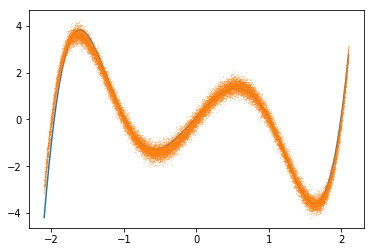

In [656]:
r2,sgd=r2_for_train_n_times(4,return_all=True)

x2_scl__=preprocess_pipe.transform(x)
y_pred=sgd.predict(x2_scl__)

plt.plot(x,y_pred)
plt.plot(x,yn,'o',markersize=0.1)
plt.show()